Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn import preprocessing # Import label encoder 
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.36
    Uninstalling Cython-0.29.36:
      Successfully uninstalled Cython-0.29.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hdbscan 0.8.33 requires cython<3,>=0.27, but you have cython 3.0.11 which is incompatible.


**Jumping to final merged data -FIRMS and ACLED data**


In [4]:
acfi_joined = pd.read_csv("af_20_23.csv", encoding = "latin1")

In [5]:
acfi_joined

,grid_id,year,fireCount,acled_count,acled_event_ids,geo_fire,geo_acled
0,"48,28",2000,0,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"48,28",2001,2,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"48,28",2002,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"48,28",2003,7,2,"[SUD1707, SUD1707]","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"48,28",2004,9,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...,...
20395,"85,41",2019,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20396,"85,41",2020,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20397,"85,41",2021,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20398,"85,41",2022,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [6]:
acfi_joined.grid_id.count()

20400

**In our final joined data we 20400 grid_ids**

In [7]:
# Find grid_id with maximum fire count
max_fire_grid = acfi_joined.loc[acfi_joined['fireCount'].idxmax(), 'grid_id']
max_fire_count = acfi_joined['fireCount'].max()

print(f"Grid ID with maximum fire count: {max_fire_grid}")
print(f"Maximum fire count: {max_fire_count}")

Grid ID with maximum fire count: 79,29
Maximum fire count: 44


In [8]:
# Find grid_id with maximum acled count
max_acled_grid = acfi_joined.loc[acfi_joined['acled_count'].idxmax(), 'grid_id']
max_acled_count = acfi_joined['acled_count'].max()

print(f"Grid ID with maximum acled count: {max_acled_grid}")
print(f"Maximum acled count: {max_acled_count}")

Grid ID with maximum acled count: 72,34
Maximum acled count: 4637


**CHECKING FOR NULL VALUES**

In [9]:
#counting NULL values by Column
acfi_joined.isnull().sum(axis=0).sort_values(ascending=False)[:12]

grid_id            0
year               0
fireCount          0
acled_count        0
acled_event_ids    0
geo_fire           0
geo_acled          0
dtype: int64

In [10]:
#Counting Null values by Rows
acfi_joined.isnull().sum(axis=1).sort_values(ascending=False).head(20)

0        0
13597    0
13604    0
13603    0
13602    0
13601    0
13600    0
13599    0
13598    0
13596    0
13606    0
13595    0
13594    0
13593    0
13592    0
13591    0
13590    0
13589    0
13605    0
13607    0
dtype: int64

In [11]:
#merged_fire_acled = pd.read_csv("acled_fire_combined_2004_2024.csv", encoding = "latin1")

In [12]:
# filtered_acled_fire_2004_24 = pd.read_csv("Acled_Firms_fire_count_year_2004_2024.csv",encoding = "latin1")

In [13]:
# filtered_acled_fire_2004_24.head()

In [14]:
# filtered_acled_fire_2004_24.grid_id.count()

In [15]:
#filtered_acled_fire_2004_24[filtered_acled_fire_2004_24['grid_id'] == '49,29']

In [16]:
# # Assuming your dataframe is called 'df'
# unique_grid_ids = filtered_acled_fire_2004_24['grid_id'].nunique()

# print(f"Number of unique grid_id values: {unique_grid_ids}")

In [17]:
# # Find grid_id with maximum fire count
# max_fire_grid = filtered_acled_fire_2004_24.loc[filtered_acled_fire_2004_24['fireCount'].idxmax(), 'grid_id']
# max_fire_count = filtered_acled_fire_2004_24['fireCount'].max()

# print(f"Grid ID with maximum fire count: {max_fire_grid}")
# print(f"Maximum fire count: {max_fire_count}")

In [18]:
# # Find grid_id with maximum acled count
# max_acled_grid = filtered_acled_fire_2004_24.loc[filtered_acled_fire_2004_24['acled_count'].idxmax(), 'grid_id']
# max_acled_count = filtered_acled_fire_2004_24['acled_count'].max()

# print(f"Grid ID with maximum acled count: {max_acled_grid}")
# print(f"Maximum acled count: {max_acled_count}")

In [292]:
# merged_fire_acled

In [293]:
# #Counting Null values by Column
# merged_fire_acled.isnull().sum(axis=0).sort_values(ascending=False)[:12]

In [294]:
# #Counting Null values by Rows
# merged_fire_acled.isnull().sum(axis=1).sort_values(ascending=False).head(20)

In [295]:
# filtered_acled_fire_2004_24.isnull().sum(axis=0).sort_values(ascending=False)[:12]

In [296]:
# #Counting Null values by Rows
# filtered_acled_fire_2004_24.isnull().sum(axis=1).sort_values(ascending=False).head(20)

**Process of making a geo-dataframe**

In [12]:
import json
# Converting the JSON strings to dictionaries for proper comparison
acfi_joined['geo_acled'] = acfi_joined['geo_acled'].apply(json.loads)
acfi_joined['geo_fire'] = acfi_joined['geo_fire'].apply(json.loads)

# Checking if the geo_acled and geo_fire columns are the same
acfi_joined['geo_equal'] = acfi_joined['geo_acled'] == acfi_joined['geo_fire']

In [13]:
acfi_joined

,grid_id,year,fireCount,acled_count,acled_event_ids,geo_fire,geo_acled,geo_equal
0,"48,28",2000,0,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True
1,"48,28",2001,2,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True
2,"48,28",2002,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True
3,"48,28",2003,7,2,"[SUD1707, SUD1707]","{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True
4,"48,28",2004,9,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True
...,...,...,...,...,...,...,...,...
20395,"85,41",2019,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True
20396,"85,41",2020,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True
20397,"85,41",2021,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True
20398,"85,41",2022,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True


In [14]:
# import json
# # Converting the JSON strings to dictionaries for proper comparison
# filtered_acled_fire_2004_24['geo_acled'] = filtered_acled_fire_2004_24['geo_acled'].apply(json.loads)
# filtered_acled_fire_2004_24['geo_fire'] = filtered_acled_fire_2004_24['geo_fire'].apply(json.loads)

# # Checking if the geo_acled and geo_fire columns are the same
# filtered_acled_fire_2004_24['geo_equal'] = filtered_acled_fire_2004_24['geo_acled'] == filtered_acled_fire_2004_24['geo_fire']



In [15]:
# # # Display the DataFrame with the comparison result
# print(filtered_acled_fire_2004_24)

In [16]:
#filtered_acled_fire_2004_24

In [17]:
from shapely.geometry import shape

# If all geo_equal are True, use geo_acled for creating GeoDataFrame
if acfi_joined['geo_equal'].all():
    # Convert the 'geo_acled' column to shapely geometries
    acfi_joined['geometry'] = acfi_joined['geo_acled'].apply(lambda x: shape(x))

    # Create a GeoDataFrame
    gdf_acfi = gpd.GeoDataFrame(acfi_joined, geometry='geometry')

    print(gdf_acfi)  # Display the GeoDataFrame
else:
    print("The geo_acled and geo_fire columns are not all the same.")    
    

      grid_id  year  fireCount  acled_count     acled_event_ids  \
0       48,28  2000          0            0                  []   
1       48,28  2001          2            0                  []   
2       48,28  2002          1            0                  []   
3       48,28  2003          7            2  [SUD1707, SUD1707]   
4       48,28  2004          9            0                  []   
...       ...   ...        ...          ...                 ...   
20395   85,41  2019          1            0                  []   
20396   85,41  2020          1            0                  []   
20397   85,41  2021          1            0                  []   
20398   85,41  2022          1            0                  []   
20399   85,41  2023          1            0                  []   

                                                geo_fire  \
0      {'geodesic': False, 'crs': {'type': 'name', 'p...   
1      {'geodesic': False, 'crs': {'type': 'name', 'p...   
2      {'geodes

In [23]:
gdf_acfi

,grid_id,year,fireCount,acled_count,acled_event_ids,geo_fire,geo_acled,geo_equal,geometry
0,"48,28",2000,0,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
1,"48,28",2001,2,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
2,"48,28",2002,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
3,"48,28",2003,7,2,"[SUD1707, SUD1707]","{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
4,"48,28",2004,9,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
...,...,...,...,...,...,...,...,...,...
20395,"85,41",2019,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True,"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20396,"85,41",2020,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True,"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20397,"85,41",2021,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True,"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20398,"85,41",2022,1,0,[],"{'geodesic': False, 'crs': {'type': 'name', 'p...","{'geodesic': False, 'crs': {'type': 'name', 'p...",True,"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."


In [24]:
# from shapely.geometry import shape

# # If all geo_equal are True, use geo_acled for creating GeoDataFrame
# if filtered_acled_fire_2004_24['geo_equal'].all():
#     # Convert the 'geo_acled' column to shapely geometries
#     filtered_acled_fire_2004_24['geometry'] = filtered_acled_fire_2004_24['geo_acled'].apply(lambda x: shape(x))

#     # Create a GeoDataFrame
#     gdf_new = gpd.GeoDataFrame(filtered_acled_fire_2004_24, geometry='geometry')

#     print(gdf_new)  # Display the GeoDataFrame
# else:
#     print("The geo_acled and geo_fire columns are not all the same.")    
    

In [25]:
# gdf_new.head()

In [18]:
gdf_acfi = gdf_acfi.drop(columns = ['geo_fire', 'geo_acled', 'geo_equal'])

In [19]:
gdf_acfi

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry
0,"48,28",2000,0,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
1,"48,28",2001,2,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
2,"48,28",2002,1,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
3,"48,28",2003,7,2,"[SUD1707, SUD1707]","POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
4,"48,28",2004,9,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
...,...,...,...,...,...,...
20395,"85,41",2019,1,0,[],"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20396,"85,41",2020,1,0,[],"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20397,"85,41",2021,1,0,[],"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20398,"85,41",2022,1,0,[],"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."


In [20]:
gdf_acfi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   grid_id          20400 non-null  object  
 1   year             20400 non-null  int64   
 2   fireCount        20400 non-null  int64   
 3   acled_count      20400 non-null  int64   
 4   acled_event_ids  20400 non-null  object  
 5   geometry         20400 non-null  geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 956.4+ KB


In [29]:
# gdf_acfi.plot()

In [30]:
# gdf_new=gdf_new.drop(columns=['geo_acled','geo_fire','geo_equal'])

In [31]:
# # Converting the JSON strings to dictionaries for proper comparison
# merged_fire_acled['geo_acled'] = merged_fire_acled['geo_acled'].apply(json.loads)
# merged_fire_acled['geo_fire'] = merged_fire_acled['geo_fire'].apply(json.loads)

# # Checking if the geo_acled and geo_fire columns are the same
# merged_fire_acled['geo_equal'] = merged_fire_acled['geo_acled'] == merged_fire_acled['geo_fire']

# # Display the DataFrame with the comparison result
# print(merged_fire_acled)

In [312]:
# from shapely.geometry import shape
# # If all geo_equal are True, use geo_acled for creating GeoDataFrame
# if merged_fire_acled['geo_equal'].all():
#     # Convert the 'geo_acled' column to shapely geometries
#     merged_fire_acled['geometry'] = merged_fire_acled['geo_acled'].apply(lambda x: shape(x))

#     # Create a GeoDataFrame
#     gdf = gpd.GeoDataFrame(merged_fire_acled, geometry='geometry')

#     # Display the GeoDataFrame
#     print(gdf)
# else:
#     print("The geo_acled and geo_fire columns are not all the same.")

In [313]:
# gdf

In [314]:
# gdf=gdf.drop(columns=['geo_acled','geo_fire','geo_equal'])

In [315]:
# gdf_new.head()

In [316]:
# gdf_new.info()

In [33]:
# #Plotting the data
# gdf_new.plot()
# plt.title('ACLED and FIRE DATA IN SUDAN')
# plt.show()

In [34]:
# print(gdf_new.crs)

**Setting the CRS**

In [36]:
# gdf_new.set_crs(epsg=4326, inplace=True)

The CRS is set to EPSG 4326.

In [37]:
# print(gdf_new.crs)

**Making Two separate interactive Maps for FIRMS and ACLED**

In [38]:
# gdf_new.describe()

In [39]:
# import folium
# from branca.colormap import LinearColormap

# # Print the current CRS
# print("Current CRS:", gdf_new.crs)

# # If CRS is None, set it (replace xxxx with the correct EPSG code)
# if gdf_new.crs is None:
#     gdf_new.set_crs(epsg=xxxx, inplace=True)
#     print("CRS set to:", gdf_new.crs)

# # Assuming your geodataframe is named 'gdf'
# # Convert the GeoDataFrame to WGS84 coordinate system if it's not already
# gdf_new = gdf_new.to_crs(epsg=4326)

# # Calculate the center of the map
# center_lat = gdf_new.geometry.centroid.y.mean()
# center_lon = gdf_new.geometry.centroid.x.mean()

# # Function to create a map
# def create_map(data, column, title, colors):
#     m = folium.Map(location=[center_lat, center_lon], zoom_start=6)
    
#     colormap = LinearColormap(colors=colors, vmin=data[column].min(), vmax=data[column].max())
    
#     for idx, row in data.iterrows():
#         color = colormap(row[column])
        
#         folium.GeoJson(
#             row['geometry'],
#             style_function=lambda x, color=color: {
#                 'fillColor': color,
#                 'color': 'grey',
#                 'weight': 1,
#                 'fillOpacity': 0.7
#             },
#             tooltip=f"{title}: {row[column]}"
#         ).add_to(m)
    
#     colormap.add_to(m)
#     m.save(f'{title.lower().replace(" ", "_")}_map_new.html')
#     print(f"Interactive {title} map saved as '{title.lower().replace(' ', '_')}_map_new.html'")

# # # Create Fire Count Map
# create_map(gdf_new, 'fireCount', 'Fire Count', ['yellow', 'orange'])

# # Create ACLED Count Map
# create_map(gdf_new, 'acled_count', 'ACLED Count', ['yellow', 'green'])

In [323]:
# import folium
# from branca.colormap import LinearColormap

# # Print the current CRS
# print("Current CRS:", gdf.crs)

# # If CRS is None, set it (replace xxxx with the correct EPSG code)
# if gdf.crs is None:
#     gdf.set_crs(epsg=xxxx, inplace=True)
#     print("CRS set to:", gdf.crs)

# # Assuming your geodataframe is named 'gdf'
# # Convert the GeoDataFrame to WGS84 coordinate system if it's not already
# gdf = gdf.to_crs(epsg=4326)

# # Calculate the center of the map
# center_lat = gdf.geometry.centroid.y.mean()
# center_lon = gdf.geometry.centroid.x.mean()

# # Function to create a map
# def create_map(data, column, title, colors):
#     m = folium.Map(location=[center_lat, center_lon], zoom_start=6)
    
#     colormap = LinearColormap(colors=colors, vmin=data[column].min(), vmax=data[column].max())
    
#     for idx, row in data.iterrows():
#         color = colormap(row[column])
        
#         folium.GeoJson(
#             row['geometry'],
#             style_function=lambda x, color=color: {
#                 'fillColor': color,
#                 'color': 'black',
#                 'weight': 1,
#                 'fillOpacity': 0.7
#             },
#             tooltip=f"{title}: {row[column]}"
#         ).add_to(m)
    
#     colormap.add_to(m)
#     m.save(f'{title.lower().replace(" ", "_")}_map.html')
#     print(f"Interactive {title} map saved as '{title.lower().replace(' ', '_')}_map.html'")

# # Create Fire Count Map
# create_map(gdf, 'fireCount', 'Fire Count', ['yellow', 'orange', 'red'])

# # Create ACLED Count Map
# create_map(gdf, 'acled_count', 'ACLED Count', ['lightblue', 'blue', 'darkblue'])

As we can see in the map we got of sudan there are no fires in the Northern part of Country. As it all deserted area most of the fires are at populated areas ---compared to Sudan population.

**Dropping Rows with zero firecount**

In [40]:
# gdf_new

In [41]:
# # Print the original number of rows
# print("Original number of rows:", len(gdf_new))

# # Filter out rows where fireCount is 0 and create a new GeoDataFrame
# gdf_filter1 = gdf_new[gdf_new['fireCount'] > 0].copy()

# # Print the number of rows after filtering
# print("Number of rows after filtering:", len(gdf_filter1))

# # Verify that we still have the necessary columns
# print("\nColumns in filtered GeoDataFrame:")
# print(gdf_filter1.columns)

In [42]:
# # Check the data types to ensure geometry is preserved
# print("\nData types:")
# print(gdf_filter1.dtypes)

In [43]:
# # Plot the original and filtered maps to visually confirm the geometries are preserved
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# gdf_new.plot(ax=ax1, column='fireCount', legend=True, cmap='YlOrRd', legend_kwds={'label': 'Fire Count'})
# ax1.set_title('Original Map')

# gdf_filter1.plot(ax=ax2, column='fireCount', legend=True, cmap='YlOrRd', legend_kwds={'label': 'Fire Count'})
# ax2.set_title('Filtered Map (fireCount > 0)')

# plt.show()

# # Print some sample data to confirm we have all necessary information
# print("\nSample data from filtered GeoDataFrame:")
# print(gdf_filter1.head())

In [44]:
# # Plot the original and filtered maps to visually confirm the geometries are preserved
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# gdf_new.plot(ax=ax1, column='acled_count', legend=True, cmap='YlOrRd', legend_kwds={'label': 'Acled Count'})
# ax1.set_title('Original Map')

# gdf_filter1.plot(ax=ax2, column='acled_count', legend=True, cmap='YlOrRd', legend_kwds={'label': 'Acled Count'})
# ax2.set_title('Filtered Map (fireCount > 0)')

# plt.show()

# # Print some sample data to confirm we have all necessary information
# print("\nSample data from filtered GeoDataFrame:")
# print(gdf_filter1.head())

In [327]:
# # Print the original number of rows
# print("Original number of rows:", len(gdf))

# # Filter out rows where fireCount is 0 and update the GeoDataFrame
# gdf_filter = gdf[gdf['fireCount'] > 0]

# # Print the number of rows after filtering
# print("Number of rows after filtering:", len(gdf_filter))

In [45]:
# gdf_filter1

In [46]:
# gdf_filter1.plot()

In [48]:
# gdf_filter1.describe()

In [49]:
# if gdf_filter1.empty:
#     print("The GeoDataFrame is empty. Please check your data.")
# else:
#     # Create the plot
#     fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#     # Plot the fire counts
#     gdf_filter1.plot(column='fireCount', 
#              ax=ax, 
#              legend=True, 
#              legend_kwds={'label': 'Fire Count', 'orientation': 'horizontal'},
#              cmap='YlOrRd',
#              missing_kwds={'color': 'lightgrey'},
#              edgecolor='black',
#              linewidth=0.5)

#     # Add a title
#     plt.title('Fire Counts by Grid', fontsize=16)

#     # Remove axes
#     ax.axis('off')

#     # Set the extent of the plot to the bounds of the data
#     ax.set_xlim(gdf_filter1.total_bounds[0], gdf_filter1.total_bounds[2])
#     ax.set_ylim(gdf_filter1.total_bounds[1], gdf_filter1.total_bounds[3])

#     # Adjust layout and save
#     plt.tight_layout()
#     plt.savefig('fire_counts_map_without_zero_fire.png', dpi=300, bbox_inches='tight')
#     plt.close()
    

#     print("Fire counts map saved as 'fire_counts_map_without_zero_fire.png'")
#     plt.show()

In [50]:
# # Print some information about the GeoDataFrame
# print(f"Number of rows: {len(gdf_filter1)}")
# print(f"Columns: {gdf_filter1.columns}")
# print(f"CRS: {gdf_filter1.crs}")
# print(f"Geometry type: {gdf_filter1.geometry.geom_type.value_counts()}")
# print(f"Bounding box: {gdf_filter1.total_bounds}")

In [51]:
# # Check if the GeoDataFrame is empty
# if gdf_filter1.empty:
#     print("The GeoDataFrame is empty. Please check your data.")
# else:
#     # Create the plot
#     fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#     # Plot the ACLED counts
#     gdf_filter1.plot(column='acled_count', 
#              ax=ax, 
#              legend=True, 
#              legend_kwds={'label': 'ACLED Count', 'orientation': 'horizontal'},
#              cmap='viridis',  # Changed to viridis colormap
#              missing_kwds={'color': 'lightgrey'},
#              edgecolor='black',
#              linewidth=0.5)
#     # Add a title
#     plt.title('ACLED Counts by Grid', fontsize=16)
#     # Remove axes
#     ax.axis('off')
#     # Set the extent of the plot to the bounds of the data
#     ax.set_xlim(gdf_filter1.total_bounds[0], gdf_filter1.total_bounds[2])
#     ax.set_ylim(gdf_filter1.total_bounds[1], gdf_filter1.total_bounds[3])
#     # Adjust layout and save
#     plt.tight_layout()
#     plt.savefig('acled_counts_map_without_zero_fire.png', dpi=300, bbox_inches='tight')
    
#     print("ACLED counts map saved as 'acled_counts_map_without_zero_fire.png'")
#     # Display the plot (optional - remove if you don't want to display it)
#     plt.show()

In [52]:
# # Print some information about the GeoDataFrame
# print(f"Number of rows: {len(gdf_filter1)}")
# print(f"Columns: {gdf_filter1.columns}")
# print(f"CRS: {gdf_filter1.crs}")
# print(f"Geometry type: {gdf_filter1.geometry.geom_type.value_counts()}")
# print(f"Bounding box: {gdf_filter1.total_bounds}")
# print(f"ACLED count range: {gdf_filter1['acled_count'].min()} to {gdf_filter1['acled_count'].max()}")

In [53]:
# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(15, 10))

# # Plot the geometries
# gdf_filter1.plot(ax=ax, edgecolor='black', alpha=0.5)

# # Add fire count labels
# for idx, row in gdf_filter1.iterrows():
#     centroid = row['geometry'].centroid
#     ax.annotate(f"Fire: {row['fireCount']}", 
#                 (centroid.x, centroid.y),
#                 xytext=(3, 3),
#                 textcoords="offset points",
#                 fontsize=8,
#                 color='red')

# # Add ACLED count labels
# for idx, row in gdf_filter1.iterrows():
#     centroid = row['geometry'].centroid
#     ax.annotate(f"ACLED: {row['acled_count']}", 
#                 (centroid.x, centroid.y),
#                 xytext=(3, -3),
#                 textcoords="offset points",
#                 fontsize=8,
#                 color='blue')

# # Set the title
# plt.title('Fire Count and ACLED Count Map')

# # Remove axis labels
# ax.set_axis_off()

# # Show the plot
# plt.tight_layout()
# plt.show()

# Check fircount and acled spread by year

In [334]:
# gdf_temp = gdf_new[gdf_new['year'] == 2004]

In [335]:
# gdf_temp.plot(x = 'fireCount', y= 'acled_count', kind = 'scatter')

# Panel Regression - from Datascience article
https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8

## Adding Log Columns

In [22]:
# Take the log of fireCount and acled_count
gdf_acfi['log_fireCount'] = np.log10(gdf_acfi['fireCount']+0.1)
gdf_acfi['log_acled_count'] = np.log10(gdf_acfi['acled_count'] + 0.1)

In [23]:
gdf_acfi.sample()

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,log_fireCount,log_acled_count
13490,"71,41",2002,0,0,[],"POLYGON ((31.89019 18.41546, 32.33935 18.41546...",-1.0000,-1.0000


In [24]:
gdf_acfi.shape

(20400, 8)

In [55]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm

## Step 1: Copy dataset and transform it into the right format.

In [44]:
def data_prep(data,col_list):
    data = data[column_list].copy()
    data = data.set_index(['grid_id', 'year'])
    years = data.index.get_level_values('year').to_list()
    data['year'] = pd.Categorical(years)
    return data

## Model: Pooled OLS with Actual Data

In [42]:
column_list = ['grid_id', 'year', 'fireCount', 'acled_count']

In [46]:
gdf_regression = data_prep(gdf_acfi,column_list)

In [56]:
x = sm.tools.tools.add_constant(gdf_regression['fireCount'])    #exog
y = gdf_regression['acled_count']                               #endog

In [57]:
# MODEL RUN

mod = PooledOLS(y,x)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [48]:
# gdf_regression1 = gdf_acfi[['grid_id', 'year', 'fireCount', 'acled_count']].copy()

In [49]:
# gdf_regression1.head()

In [50]:
# print(gdf_regression1.columns)

In [51]:
# gdf_regression1 = gdf_regression1.set_index(['grid_id', 'year'])

In [52]:
# gdf_regression1.head()

In [53]:
# years = gdf_regression1.index.get_level_values('year').to_list()
# # gdf_regression1['year'] = pd.Categorical(years)

In [54]:
# # Prepare the dependent and independent variables
# x = gdf_regression['fireCount']
# y = gdf_regression1[['acled_count']]

**Ho : There is no relationship between Acled count and firecount** 

**Ha : There is relationship between Acled count and firecount** 

In [25]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:            acled_count   R-squared:                        0.0004
Estimator:                  PooledOLS   R-squared (Between):              0.0030
No. Observations:               20400   R-squared (Within):               0.0002
Date:                Mon, Aug 05 2024   R-squared (Overall):              0.0004
Time:                        23:39:25   Log-likelihood                -1.005e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      9.1147
Entities:                         850   P-value                           0.0025
Avg Obs:                       24.000   Distribution:                 F(1,20398)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             6.1326
                            

In [80]:
from linearmodels import PanelOLS

In [81]:
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Run the fixed effects model
model = PanelOLS(Y, X, entity_effects=True, time_effects=True)
results = model.fit()

In [82]:
# Print the summary of the results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:        log_acled_count   R-squared:                        0.0029
Estimator:                   PanelOLS   R-squared (Between):              0.0768
No. Observations:               20400   R-squared (Within):               0.0059
Date:                Tue, Aug 06 2024   R-squared (Overall):              0.0383
Time:                        20:43:13   Log-likelihood                   -7800.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      56.717
Entities:                         850   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(1,19526)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             56.717
                            

In [83]:
# Print the summary of the results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:          log_fireCount   R-squared:                        0.0028
Estimator:                   PanelOLS   R-squared (Between):              0.0125
No. Observations:               20400   R-squared (Within):               0.0053
Date:                Tue, Aug 06 2024   R-squared (Overall):              0.0114
Time:                        00:02:40   Log-likelihood                 -1.09e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      55.319
Entities:                         850   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(1,19526)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             55.319
                            

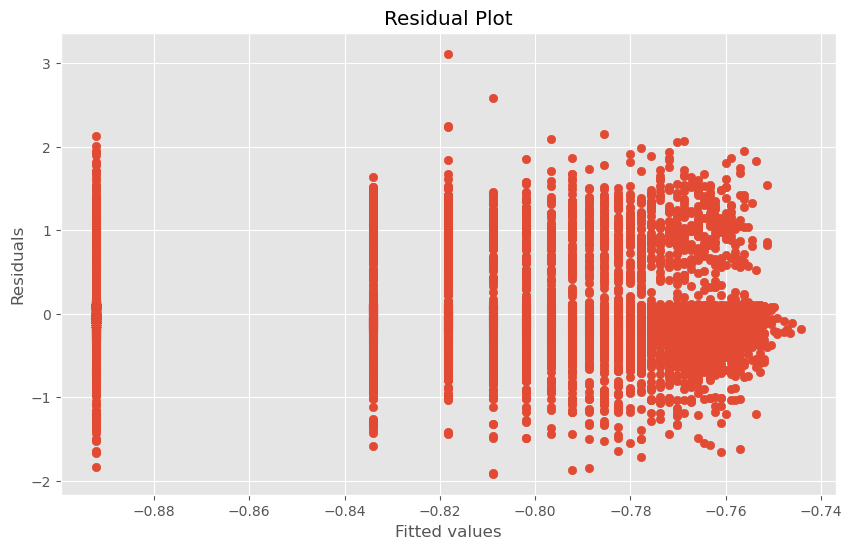

In [83]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(results.fitted_values, results.resids)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

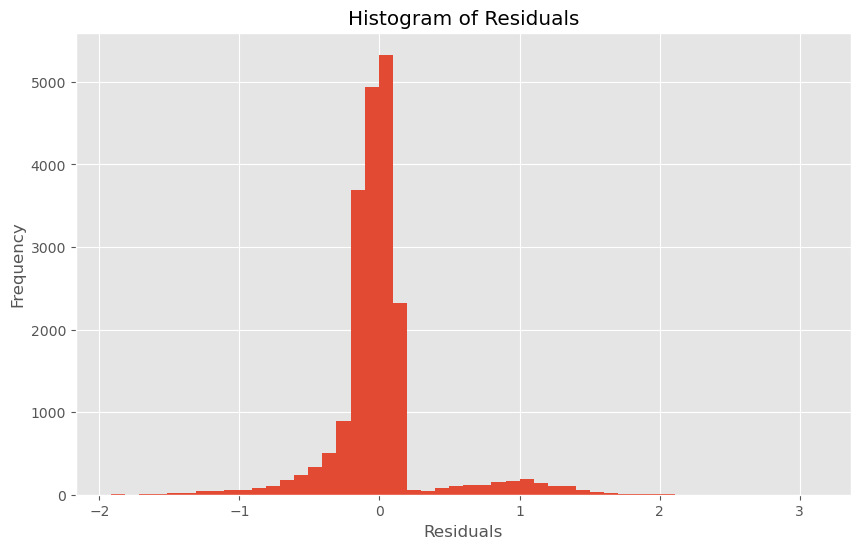

In [84]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(results.resids, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [15]:
gdf_regression= gdf_acfi[['grid_id', 'year', 'fireCount', 'acled_count']].copy()
gdf_regression.set_index(['grid_id', 'year'], inplace=True)

In [16]:
gdf_regression.sample()

,,fireCount,acled_count
grid_id,year,,
"68,26",2005,17,0


In [17]:
gdf_regression

fireCount  acled_count
grid_id year                        
48,28   2000          0            0
        2001          2            0
        2002          1            0
        2003          7            2
        2004          9            0
...                 ...          ...
85,41   2019          1            0
        2020          1            0
        2021          1            0
        2022          1            0
        2023          1            0

[20400 rows x 2 columns]

In [18]:
gdf_regression.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20400 entries, ('48,28', 2000) to ('85,41', 2023)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   fireCount    20400 non-null  int64
 1   acled_count  20400 non-null  int64
dtypes: int64(2)
memory usage: 418.3+ KB


In [19]:
gdf_regression.head()

fireCount  acled_count
grid_id year                        
48,28   2000          0            0
        2001          2            0
        2002          1            0
        2003          7            2
        2004          9            0

In [21]:
gdf_regression.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20400 entries, ('48,28', 2000) to ('85,41', 2023)
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   fireCount    20400 non-null  int64   
 1   acled_count  20400 non-null  int64   
 2   year         20400 non-null  category
dtypes: category(1), int64(2)
memory usage: 438.9+ KB


In [346]:
# gdf_regression.info()

In [22]:
gdf_regression.head()

fireCount  acled_count  year
grid_id year                              
48,28   2000          0            0  2000
        2001          2            0  2001
        2002          1            0  2002
        2003          7            2  2003
        2004          9            0  2004

## Step 2: Start with PooledOLS and check required assumptions

Assumed

'acled_count' as Dependent variable

'fireCount' as independent variable

Choosing between PooledOLS and FE/RE: Basically, there are five assumptions for simple linear regression models that must be fulfilled. Two of them can help us in choosing between PooledOLS and FE/RE.

These assumptions are (1) Linearity, (2) Exogeneity, (3a) Homoskedasticity and (3b) Non-autocorrelation, (4) Independent variables are not Stochastic and (5) No Multicolinearity.

If assumption (2) or (3) (or both) are violated, then FE or RE might be more suitable.

I would recommend to start performing PooledOLS. Since it can be seen as a simple OLS model, it has to fulfill certain assumptions (those in the chapter “How to decide which Model is appropriate?” ). As stated above, if condition 2 or 3 (or both) are violated, then FE-/RE-models are likely more suitable. Since condition 2 can only be tested further down with the Hausman-Test, we will stick to proving condition 3 for now.



Check condition 3:

Condition 3 is splitted in 3a (Homoskedasticity) and 3b (Non-Autocorrelation). Those assumptions can be tested with a number of different tests. For condition 3a, I will show you how to identify heteroscedasticity graphically as well as perform the White-Test and Breusch-Pagan-Test (both are similar). For condition 3b, I will show you the Durbin-Watson-Test.

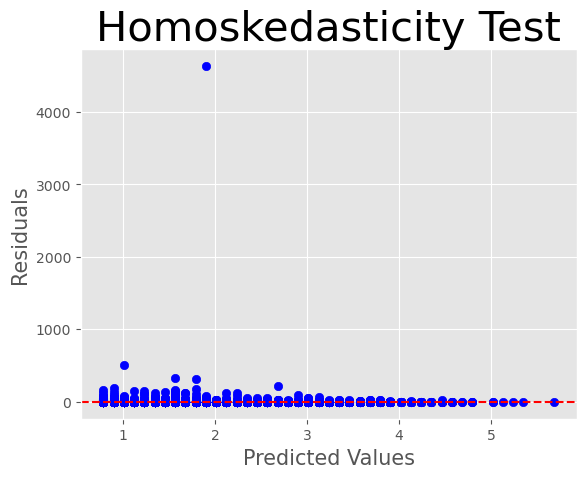

In [26]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
# 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

Basically, a residuals-plot represents predicted values (x-axis) vs. residuals (y-axis). If the plotted data points spread out, this is an indicator for growing variance and thus, for heteroskedasticity. Since this seems to be the case in our example, we might have the first violation. But let´s check this with the White- and the Breusch-Pagan-Test:



In [27]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([gdf_regression, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
x = sm.tools.tools.add_constant(gdf_regression['fireCount']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], x)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], x)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 4.541747214965008, 'LM p-val': 0.10322196520148118, 'F-Stat': 2.271045268889028, 'F p-val': 0.10323034345535638}
{'LM-Stat': 1.1642691735751942, 'LM p-val': 0.2805819077845766, 'F-Stat': 1.1642214740068644, 'F p-val': 0.2806045197432964}


In simple terms, if p < 0.05, then heteroskedasticity is indicated. Both tests give very small p-values (White-test: 3.442621728589391e-44, Breusch-Pagan-test: 6.032616972194746e-2


** In our case p > 0.05, h heteroskedasticity is not indicated  **



In [28]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.8200144961026898


The Durbin-Watson-Test will have one output between 0 – 4. The mean (= 2) would indicate that there is no autocorrelation identified, 0 – 2 means positive autocorrelation (the nearer to zero the higher the correlation), and 2 – 4 means negative autocorrelation (the nearer to four the higher the correlation).

In our case the result is 1.7086665034473183, which clearly indicates weak positive autocorrelation or no autocorrelation. This may be due to presence of anonymous fires in the data. If we can remove anonymous fires - it may help us improving the coorelation.

## Step 3: Checking Anomalous Fires

In [86]:
gdf_acfi.sample()

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry
9831,"66,26",2015,12,12,"[SUD8654, SUD8654, SUD7792, SUD7792, SUD8421, ...","POLYGON ((29.64440 11.67810, 30.09356 11.67810..."


In [87]:
gridlist = gdf_acfi.grid_id.unique()
print(len(gridlist))

850


In [88]:
# Initialize the dictionary to store results
stats_dict = {}

for gid in gridlist:
    mean = gdf_acfi['fireCount'][gdf_acfi['grid_id'] == gid].mean()
    std = gdf_acfi['fireCount'][gdf_acfi['grid_id'] == gid].std()
    
    # write results in dictionary
    stats_dict[gid] = (mean, std)
    
    #print(gid, mean)
    #print(gid, std)

In [89]:
# Calculate z-score for each row in the DataFrame
def calculate_zscore(row):
    mean, std = stats_dict[row['grid_id']]
    if std == 0:
        return 0  # Handle the case where std is 0 to avoid division by zero
    return (row['acled_count'] - mean) / std

In [90]:
# Apply the function to each row
gdf_acfi['zscore'] = gdf_acfi.apply(calculate_zscore, axis=1)

In [91]:
gdf_acfi.head()

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,zscore
0,"48,28",2000,0,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-1.1663
1,"48,28",2001,2,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-1.1663
2,"48,28",2002,1,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-1.1663
3,"48,28",2003,7,2,"[SUD1707, SUD1707]","POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-0.3666
4,"48,28",2004,9,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-1.1663


<Axes: xlabel='fireCount', ylabel='zscore'>

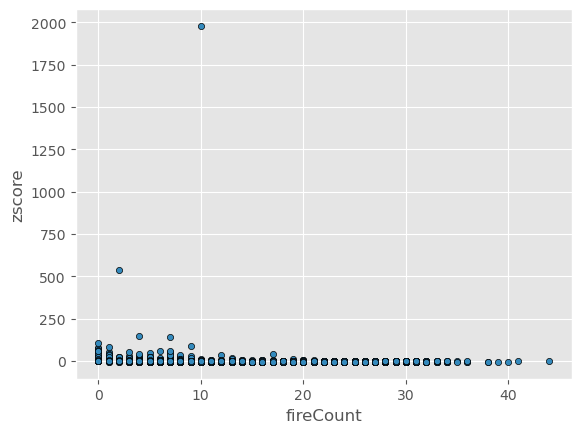

In [35]:
gdf_acfi.plot(kind='scatter', x='fireCount', y='zscore', edgecolor='black')

<Axes: xlabel='fireCount', ylabel='acled_count'>

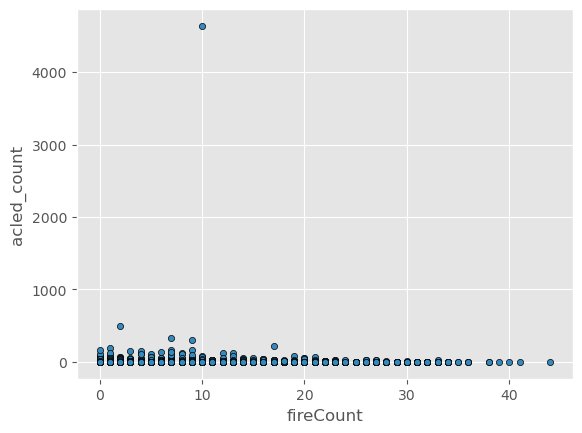

In [36]:
gdf_acfi.plot(kind='scatter', x='fireCount', y='acled_count', edgecolor='black')

In [92]:
gdf_acfi[(gdf_acfi['zscore'] > 3) | (gdf_acfi['zscore'] < -3)].shape

(1120, 7)

In [93]:
gdf_acfi[(gdf_acfi['zscore'] > 2) | (gdf_acfi['zscore'] < -2)].shape

(2653, 7)

<Axes: xlabel='fireCount', ylabel='zscore'>

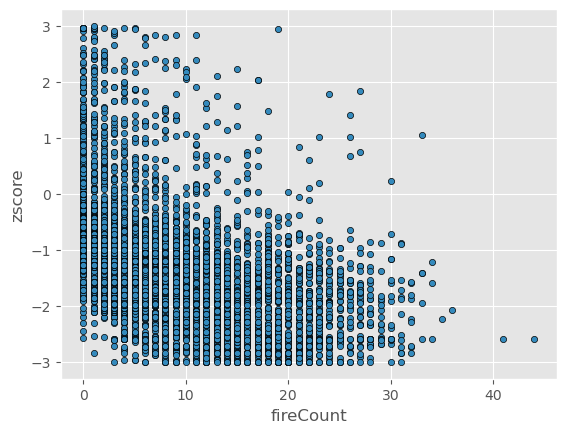

In [94]:
gdf_acfi[(gdf_acfi['zscore'] < 3) & (gdf_acfi['zscore'] > -3)].plot(kind='scatter', x='fireCount', y='zscore', edgecolor='black')

<Axes: xlabel='fireCount', ylabel='acled_count'>

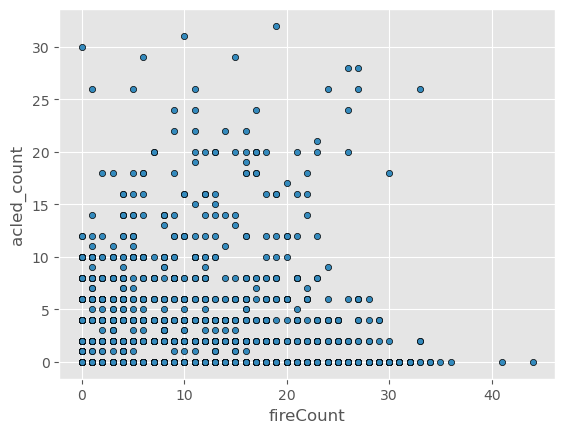

In [95]:
gdf_acfi[(gdf_acfi['zscore'] < 3) & (gdf_acfi['zscore'] > -3)].plot(kind='scatter', x='fireCount', y='acled_count', edgecolor='black')

# Trying log with z score 

In [ ]:
gdf_regression2 = gdf_acfi[(gdf_acfi['zscore'] < 3) & (gdf_acfi['zscore'] > -3)][['grid_id', 'year', 'fireCount', 'acled_count']].copy()

In [98]:
gdf_regression2 

,grid_id,year,fireCount,acled_count
0,"48,28",2000,0,0
1,"48,28",2001,2,0
2,"48,28",2002,1,0
3,"48,28",2003,7,2
4,"48,28",2004,9,0
...,...,...,...,...
20395,"85,41",2019,1,0
20396,"85,41",2020,1,0
20397,"85,41",2021,1,0
20398,"85,41",2022,1,0


In [100]:
#take log
gdf_regression2['log_fireCount'] = np.log(gdf_regression2['fireCount'] + 1)
gdf_regression2['log_acled_count'] = np.log(gdf_regression2['acled_count'] + 1)


In [101]:
gdf_regression2 

,grid_id,year,fireCount,acled_count,log_fireCount,log_acled_count
0,"48,28",2000,0,0,0.0000,0.0000
1,"48,28",2001,2,0,1.0986,0.0000
2,"48,28",2002,1,0,0.6931,0.0000
3,"48,28",2003,7,2,2.0794,1.0986
4,"48,28",2004,9,0,2.3026,0.0000
...,...,...,...,...,...,...
20395,"85,41",2019,1,0,0.6931,0.0000
20396,"85,41",2020,1,0,0.6931,0.0000
20397,"85,41",2021,1,0,0.6931,0.0000
20398,"85,41",2022,1,0,0.6931,0.0000


In [102]:
gdf_regression2 = gdf_regression2.set_index(['grid_id', 'year'])

In [103]:
gdf_regression2

fireCount  acled_count                            log_fireCount  \
grid_id year                                                                    
48,28   2000          0            0                                   0.0000   
        2001          2            0                                   1.0986   
        2002          1            0                                   0.6931   
        2003          7            2                                   2.0794   
        2004          9            0                                   2.3026   
...                 ...          ...                                      ...   
85,41   2019          1            0                                   0.6931   
        2020          1            0                                   0.6931   
        2021          1            0                                   0.6931   
        2022          1            0                                   0.6931   
        2023          1            0                                   0.6931   

                                      log_acled_count  
grid_id year                                           
48,28   2000                                   0.0000  
        2001                                   0.0000  
        2002                                   0.0000  
        2003                                   1.0986  
        2004                                   0.0000  
...                                               ...  
85,41   2019                                   0.0000  
        2020                                   0.0000  
        2021                                   0.0000  
        2022                                   0.0000  
        2023                                   0.0000  

[19280 rows x 4 columns]

In [104]:
# Prepare the dependent and independent variables
Y = gdf_regression2['log_fireCount']
X = gdf_regression2[['log_acled_count']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Run the fixed effects model
model = PanelOLS(Y, X, entity_effects=True, time_effects=True)
results = model.fit()

In [105]:
# Print the summary of the results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:          log_fireCount   R-squared:                        0.0018
Estimator:                   PanelOLS   R-squared (Between):              0.0201
No. Observations:               19280   R-squared (Within):               0.0033
Date:                Tue, Aug 06 2024   R-squared (Overall):              0.0124
Time:                        00:42:38   Log-likelihood                -1.028e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      33.497
Entities:                         836   P-value                           0.0000
Avg Obs:                       23.062   Distribution:                 F(1,18420)
Min Obs:                       1.0000                                           
Max Obs:                       24.000   F-statistic (robust):             33.497
                            

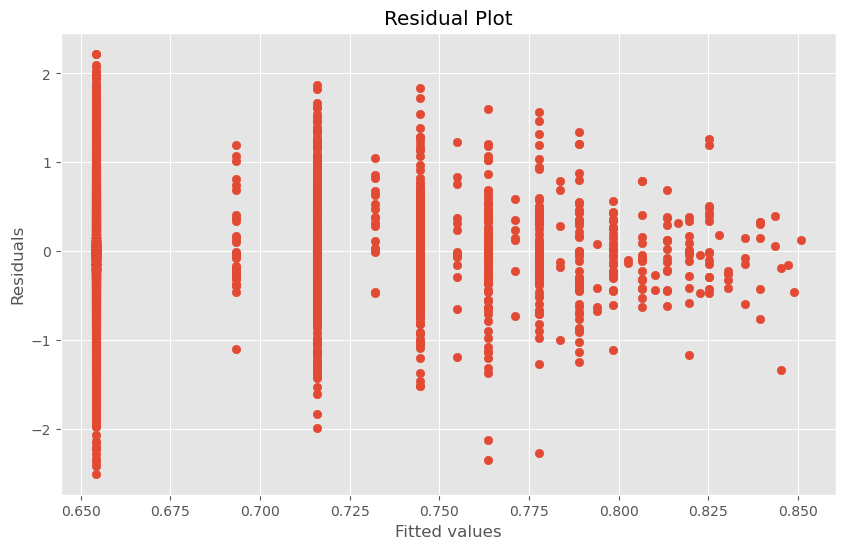

In [106]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(results.fitted_values, results.resids)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

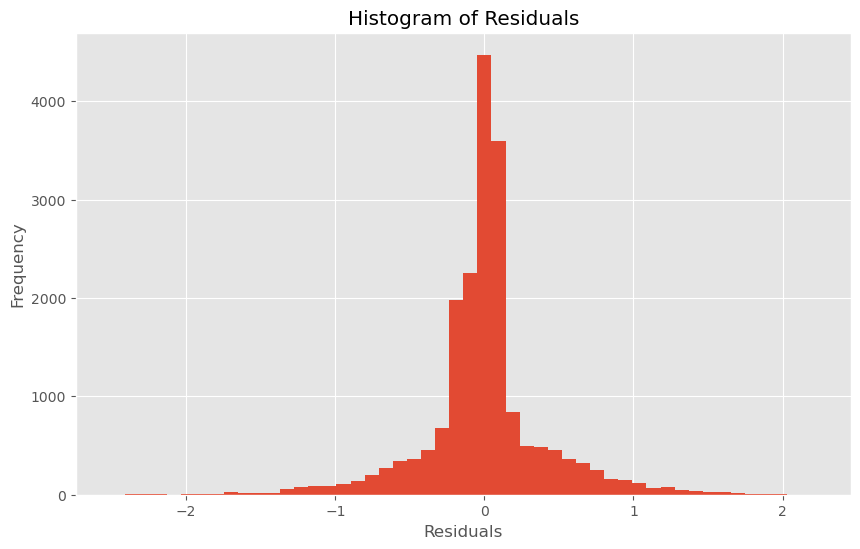

In [107]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(results.resids, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

## Step 4: Create new regression data set and transform it into the right format.

In [41]:
gdf_regression1 = gdf_acfi[(gdf_acfi['zscore'] < 3) & (gdf_acfi['zscore'] > -3)][['grid_id', 'year', 'fireCount', 'acled_count']].copy()
gdf_regression1.set_index(['grid_id', 'year'], inplace=True)

In [42]:
gdf_regression1.shape

(19280, 2)

In [43]:
gdf_regression1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19280 entries, ('48,28', 2000) to ('85,41', 2023)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   fireCount    19280 non-null  int64
 1   acled_count  19280 non-null  int64
dtypes: int64(2)
memory usage: 397.4+ KB


In [44]:
years = gdf_regression1.index.get_level_values('year').to_list()
gdf_regression1['year'] = pd.Categorical(years)

In [45]:
gdf_regression1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19280 entries, ('48,28', 2000) to ('85,41', 2023)
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   fireCount    19280 non-null  int64   
 1   acled_count  19280 non-null  int64   
 2   year         19280 non-null  category
dtypes: category(1), int64(2)
memory usage: 417.0+ KB


In [46]:
gdf_regression1.head()

fireCount  acled_count  year
grid_id year                              
48,28   2000          0            0  2000
        2001          2            0  2001
        2002          1            0  2002
        2003          7            2  2003
        2004          9            0  2004

# Step 5: Start with PooledOLS and check required assumptions

Assumed

'acled_count' as Dependent variable

'fireCount' as independent variable

Choosing between PooledOLS and FE/RE: Basically, there are five assumptions for simple linear regression models that must be fulfilled. Two of them can help us in choosing between PooledOLS and FE/RE.

These assumptions are (1) Linearity, (2) Exogeneity, (3a) Homoskedasticity and (3b) Non-autocorrelation, (4) Independent variables are not Stochastic and (5) No Multicolinearity.

If assumption (2) or (3) (or both) are violated, then FE or RE might be more suitable.

I would recommend to start performing PooledOLS. Since it can be seen as a simple OLS model, it has to fulfill certain assumptions (those in the chapter “How to decide which Model is appropriate?” ). As stated above, if condition 2 or 3 (or both) are violated, then FE-/RE-models are likely more suitable. Since condition 2 can only be tested further down with the Hausman-Test, we will stick to proving condition 3 for now.



In [47]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm

x = sm.tools.tools.add_constant(gdf_regression1['fireCount'])    #exog
y = gdf_regression1['acled_count']                               #endog

mod = PooledOLS(y,x)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [48]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:            acled_count   R-squared:                        0.0464
Estimator:                  PooledOLS   R-squared (Between):              0.1671
No. Observations:               19280   R-squared (Within):              -0.0140
Date:                Mon, Aug 05 2024   R-squared (Overall):              0.0464
Time:                        23:41:11   Log-likelihood                -3.739e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      938.34
Entities:                         836   P-value                           0.0000
Avg Obs:                       23.062   Distribution:                 F(1,19278)
Min Obs:                       1.0000                                           
Max Obs:                       24.000   F-statistic (robust):             57.006
                            

Check condition 3:

Condition 3 is splitted in 3a (Homoskedasticity) and 3b (Non-Autocorrelation). Those assumptions can be tested with a number of different tests. For condition 3a, I will show you how to identify heteroscedasticity graphically as well as perform the White-Test and Breusch-Pagan-Test (both are similar). For condition 3b, I will show you the Durbin-Watson-Test.

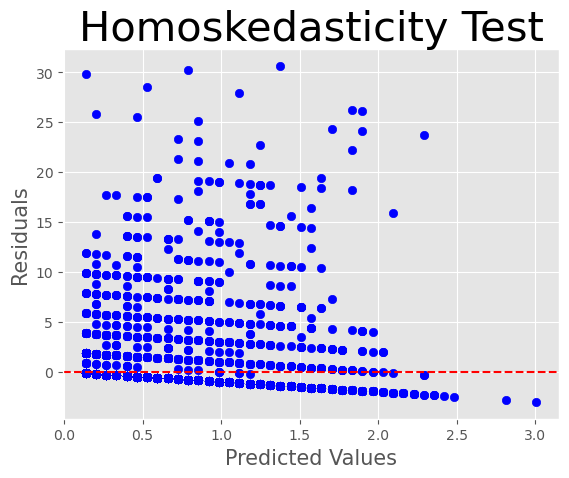

In [49]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
# 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

Basically, a residuals-plot represents predicted values (x-axis) vs. residuals (y-axis). If the plotted data points spread out, this is an indicator for growing variance and thus, for heteroskedasticity. Since this seems to be the case in our example, we might have the first violation. But let´s check this with the White- and the Breusch-Pagan-Test:



In [50]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([gdf_regression1, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
x = sm.tools.tools.add_constant(gdf_regression1['fireCount']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], x)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], x)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 478.6255630423349, 'LM p-val': 1.1689058615592894e-104, 'F-Stat': 245.3667685228031, 'F p-val': 5.920278841384895e-106}
{'LM-Stat': 459.2948669497316, 'LM p-val': 6.844482993178188e-102, 'F-Stat': 470.4545543040408, 'F p-val': 4.351955031724834e-103}


In simple terms, if p < 0.05, then heteroskedasticity is indicated. Both tests give very small p-values (White-test: 3.442621728589391e-44, Breusch-Pagan-test: 6.032616972194746e-2


** In our case p > 0.05, h heteroskedasticity is not indicated  **



In [51]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.0846101040176455


The Durbin-Watson-Test will have one output between 0 – 4. The mean (= 2) would indicate that there is no autocorrelation identified, 0 – 2 means positive autocorrelation (the nearer to zero the higher the correlation), and 2 – 4 means negative autocorrelation (the nearer to four the higher the correlation).

In our case the result is 1.7086665034473183, which clearly indicates weak positive autocorrelation or no autocorrelation. This may be due to presence of anonymous fires in the data. If we can remove anonymous fires - it may help us improving the coorelation.

# Step 6: Perform FE- and RE- model

**We will take the log of both dependant and independant variables.**

In [376]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects

#exog = sm.tools.tools.add_constant(dataset['income'])
#endog = dataset[‘violent’]

x = sm.tools.tools.add_constant(gdf_regression1['fireCount'])    #exog
y = gdf_regression1['acled_count']                               #endog

# random effects model
model_re = RandomEffects(y,x) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(y, x, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:            acled_count   R-squared:                        0.0049
Estimator:              RandomEffects   R-squared (Between):              0.0811
No. Observations:               19280   R-squared (Within):              -0.0008
Date:                Sun, Aug 04 2024   R-squared (Overall):              0.0250
Time:                        20:19:11   Log-likelihood                -3.423e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      95.878
Entities:                         836   P-value                           0.0000
Avg Obs:                       23.062   Distribution:                 F(1,19278)
Min Obs:                       1.0000                                           
Max Obs:                       24.000   F-statistic (robust):             64.074
                            

# Not Used : Remove Anonymous Fires (Non-conflict Fires)

In [103]:
gdf_acfi.sample()

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,zscore
959,"52,27",2023,18,0,[],"POLYGON ((23.35620 12.12726, 23.80536 12.12726...",-2.9985


In [141]:
filter_years = [2001,2008,2019,2020,2021,2022,2023]
gdf_temp = gdf_acfi[~gdf_acfi['year'].isin(filter_years)].copy()
mean1 = gdf_acfi['fireCount'].mean()
mean2 = gdf_temp['fireCount'].mean()
print(mean1)
print(mean2)

3.3183333333333334
3.036332179930796


In [140]:
gdf_temp.shape

(14450, 7)

In [143]:
gridlist = gdf_acfi.grid_id.unique()
print(len(gridlist))

850


In [144]:
# Initialize the dictionary to store results
mean_dict = {}
filter_years = [2001,2008,2019,2020,2021,2022,2023]
gdf_temp = gdf_acfi[~gdf_acfi['year'].isin(filter_years)].copy()

for gid in gridlist:
    mean = gdf_temp['fireCount'][gdf_temp['grid_id'] == gid].mean()
    
    # write results in dictionary
    mean_dict[gid] = (mean)
    
    #print(gid, mean)
    #print(gid, std)

In [145]:
mean_dict

{'48,28': 2.411764705882353,
 '48,29': 1.5294117647058822,
 '49,27': 3.9411764705882355,
 '49,28': 8.764705882352942,
 '49,29': 3.235294117647059,
 '49,30': 3.176470588235294,
 '49,31': 1.4705882352941178,
 '49,32': 0.23529411764705882,
 '50,24': 15.294117647058824,
 '50,25': 14.058823529411764,
 '50,26': 6.882352941176471,
 '50,27': 3.588235294117647,
 '50,28': 8.058823529411764,
 '50,29': 4.117647058823529,
 '50,30': 1.1764705882352942,
 '50,31': 3.176470588235294,
 '50,32': 0.058823529411764705,
 '50,33': 0.0,
 '51,23': 11.235294117647058,
 '51,24': 15.705882352941176,
 '51,25': 13.588235294117647,
 '51,26': 13.647058823529411,
 '51,27': 9.529411764705882,
 '51,28': 9.705882352941176,
 '51,29': 2.0,
 '51,30': 0.058823529411764705,
 '51,31': 0.23529411764705882,
 '51,32': 0.17647058823529413,
 '51,33': 0.0,
 '51,34': 0.0,
 '51,35': 0.0,
 '52,19': 3.6470588235294117,
 '52,20': 5.117647058823529,
 '52,21': 5.0,
 '52,22': 11.823529411764707,
 '52,23': 12.941176470588236,
 '52,24': 11.64

In [152]:
# Calculate z-score for each row in the DataFrame
def calculate_conflict_fire(row):
    mean = mean_dict[row['grid_id']]
    return max(0,row['fireCount'] - np.round(mean, decimals=0))

In [153]:
# Apply the function to each row
gdf_acfi['conflict_fire'] = gdf_acfi.apply(calculate_conflict_fire, axis=1)

In [154]:
gdf_acfi.head()

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,zscore,conflict_fire
0,"48,28",2000,0,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-1.1663,0.0000
1,"48,28",2001,2,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-1.1663,0.0000
2,"48,28",2002,1,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-1.1663,0.0000
3,"48,28",2003,7,2,"[SUD1707, SUD1707]","POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-0.3666,5.0000
4,"48,28",2004,9,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...",-1.1663,7.0000


<Axes: xlabel='conflict_fire', ylabel='acled_count'>

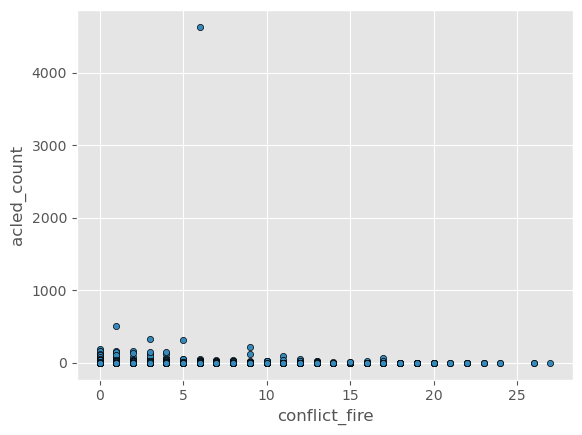

In [156]:
gdf_acfi.plot(kind='scatter', x='conflict_fire', y='acled_count', edgecolor='black')

## Not Used : Removed Non-Conflict-fire - Create new regression data set and transform it into the right format.

In [163]:
gdf_regression2 = gdf_acfi[(gdf_acfi['zscore'] < 3) & (gdf_acfi['zscore'] > -3)][['grid_id', 'year', 'conflict_fire', 'acled_count']].copy()
gdf_regression2.set_index(['grid_id', 'year'], inplace=True)

In [164]:
gdf_regression2.shape

(19280, 2)

In [165]:
gdf_regression2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19280 entries, ('48,28', 2000) to ('85,41', 2023)
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   conflict_fire  19280 non-null  float64
 1   acled_count    19280 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 397.4+ KB


In [166]:
years = gdf_regression2.index.get_level_values('year').to_list()
gdf_regression2['year'] = pd.Categorical(years)

In [167]:
gdf_regression2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19280 entries, ('48,28', 2000) to ('85,41', 2023)
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   conflict_fire  19280 non-null  float64 
 1   acled_count    19280 non-null  int64   
 2   year           19280 non-null  category
dtypes: category(1), float64(1), int64(1)
memory usage: 417.0+ KB


In [168]:
gdf_regression2.head()

conflict_fire  acled_count  year
grid_id year                                                            
48,28   2000                                   0.0000            0  2000
        2001                                   0.0000            0  2001
        2002                                   0.0000            0  2002
        2003                                   5.0000            2  2003
        2004                                   7.0000            0  2004

## Not Used - No Improvement: Conflict_fire: Start with PooledOLS and check required assumptions

In [176]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm

x = sm.tools.tools.add_constant(gdf_regression2['conflict_fire'])    #exog
y = gdf_regression2['acled_count']                               #endog

mod = PooledOLS(y,x)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [177]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:            acled_count   R-squared:                        0.0099
Estimator:                  PooledOLS   R-squared (Between):              0.0176
No. Observations:               19280   R-squared (Within):              -0.0075
Date:                Sun, Aug 04 2024   R-squared (Overall):              0.0099
Time:                        20:10:02   Log-likelihood                -3.775e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      192.57
Entities:                         836   P-value                           0.0000
Avg Obs:                       23.062   Distribution:                 F(1,19278)
Min Obs:                       1.0000                                           
Max Obs:                       24.000   F-statistic (robust):             36.996
                            

# OLD CODE

In [131]:
# Prepare the data for regression
#X = gdf_filter1['acled_count']  # Independent variable
#y = gdf_filter1['fireCount']    # Dependent variable

y = gdf_regression['acled_count']  # dependent variable
X = gdf_regression['fireCount']    # independent variable

In [132]:
# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            acled_count   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1156.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          4.50e-245
Time:                        09:13:42   Log-Likelihood:                -34001.
No. Observations:               16599   AIC:                         6.801e+04
Df Residuals:                   16597   BIC:                         6.802e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1538      0.016      9.476      0.0

In [50]:
X.head()

,const,acled_count
0,1.0000,0
1,1.0000,2
2,1.0000,0
3,1.0000,0
4,1.0000,44


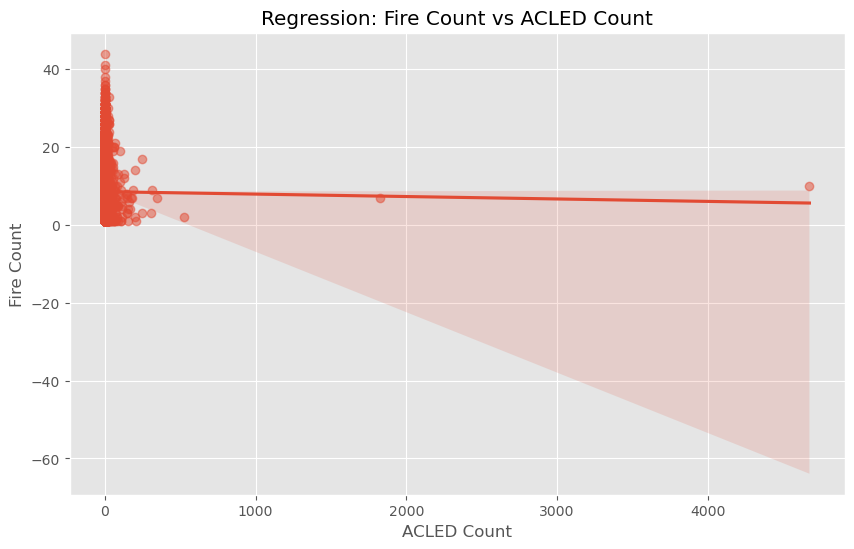

In [52]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='acled_count', y='fireCount', data=gdf_filter1, scatter_kws={'alpha':0.5})
plt.title('Regression: Fire Count vs ACLED Count')
plt.xlabel('ACLED Count')
plt.ylabel('Fire Count')
plt.show()

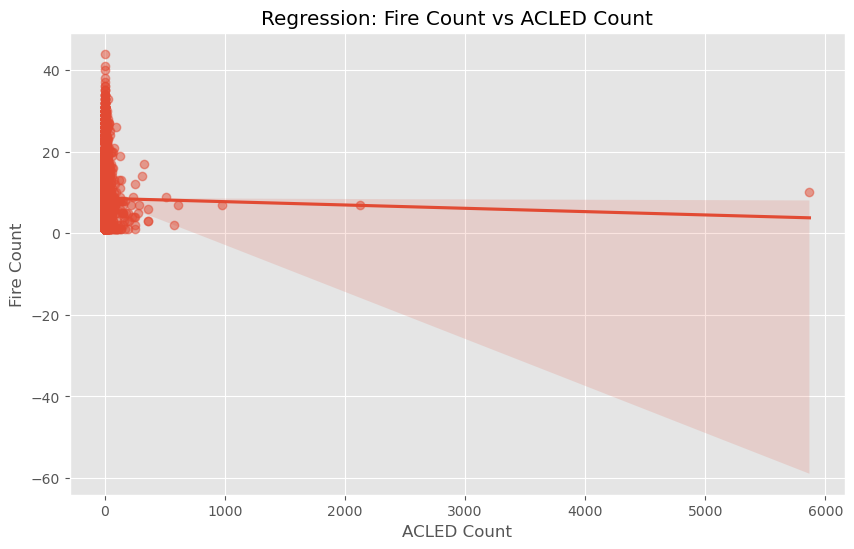

In [49]:
# # Create a scatter plot with regression line
# plt.figure(figsize=(10, 6))
# sns.regplot(x='acled_count', y='fireCount', data=gdf_filter1, scatter_kws={'alpha':0.5})
# plt.title('Regression: Fire Count vs ACLED Count')
# plt.xlabel('ACLED Count')
# plt.ylabel('Fire Count')
# plt.show()

In [50]:
# Print additional statistics
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"Prob (F-statistic): {model.f_pvalue:.4f}")

# Print coefficients
print("\nCoefficients:")
print(f"Intercept: {model.params[0]:.4f}")
print(f"ACLED Count: {model.params[1]:.4f}")

# Print p-values
print("\np-values:")
print(f"Intercept: {model.pvalues[0]:.4f}")
print(f"ACLED Count: {model.pvalues[1]:.4f}")

R-squared: 0.0001
Adjusted R-squared: -0.0001
F-statistic: 0.5155
Prob (F-statistic): 0.4728

Coefficients:
Intercept: 8.5596
ACLED Count: -0.0008

p-values:
Intercept: 0.0000
ACLED Count: 0.4728


R-squared: 0.000

This indicates that there is essentially no linear relationship between ACLED count and fire count. The model explains 0% of the variability in fire count.


Adj. R-squared: -0.000

The adjusted R-squared is also effectively zero, confirming the lack of explanatory power.


F-statistic: 0.5155 with Prob (F-statistic): 0.473

This high p-value (> 0.05) suggests that the model is not statistically significant.


Coefficients:

Intercept (const): 8.5596

This is the expected fire count when ACLED count is zero.


acled_count: -0.0008

For each unit increase in ACLED count, the fire count is expected to decrease by 0.0008. However, this is not statistically significant.




P-values:

Intercept: 0.000 (statistically significant)
acled_count: 0.473 (not statistically significant, as it's > 0.05)


Durbin-Watson: 1.052

This value is below 2, suggesting positive autocorrelation in the residuals.


Jarque-Bera (JB) test: 1252.156 with Prob(JB): 1.25e-272

This very low p-value suggests that the residuals are not normally distributed.



Interpretation:

There is no significant linear relationship between ACLED count and fire count.
The model has no explanatory power (R-squared ≈ 0).
The coefficient for ACLED count is not statistically significant (p-value > 0.05).
The residuals show signs of autocorrelation and are not normally distributed, which violates some assumptions of OLS regression.

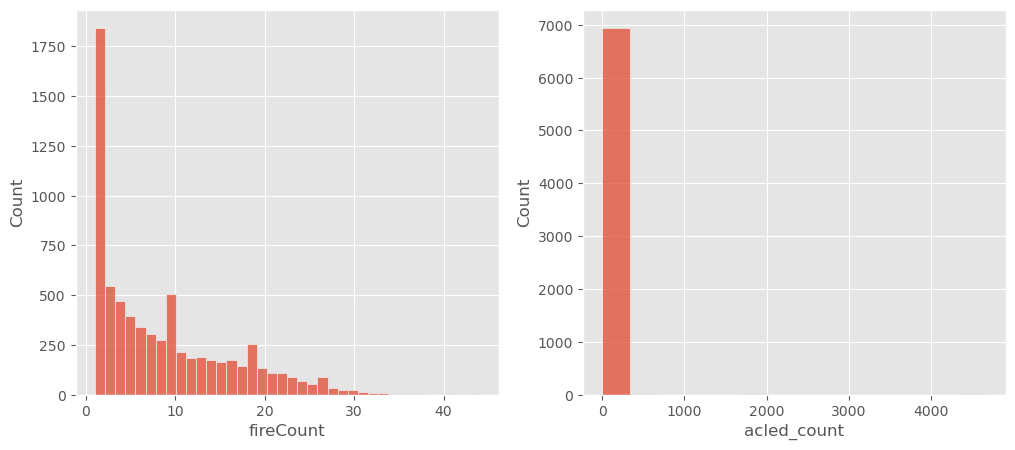

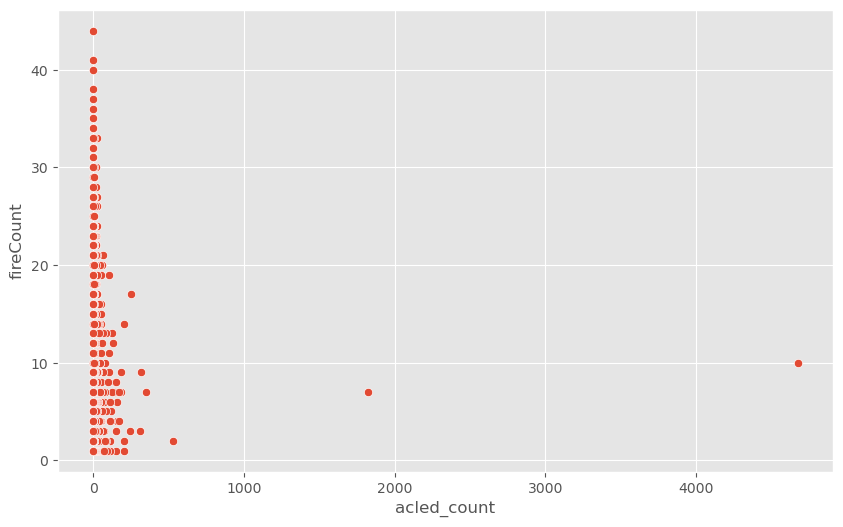

In [61]:
# Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(gdf_filter1['fireCount'], ax=ax1)
sns.histplot(gdf_filter1['acled_count'], ax=ax2)
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acled_count', y='fireCount', data=gdf_filter1)
plt.show()

In [62]:
# We'll use 'fireCount' as the dependent variable and 'acled_count' as the independent variable

# Prepare your data
y = gdf_filter1['fireCount']
X = gdf_filter1[['acled_count']]
X = sm.add_constant(X)  # Add a constant term

# Fit the Poisson Regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Print the summary of the results
print(poisson_results.summary())

# If you want to make predictions
predictions = poisson_results.predict(X)

# Add predictions to your geodataframe
gdf_predicted = gdf_filter1
gdf_predicted['predicted_fireCount'] = predictions

# Calculate and print pseudo R-squared
null_model = sm.GLM(y, sm.add_constant(np.ones_like(y)), family=sm.families.Poisson()).fit()
pseudo_r2 = 1 - (poisson_results.deviance / null_model.deviance)
print(f"Pseudo R-squared: {pseudo_r2}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              fireCount   No. Observations:                 6947
Model:                            GLM   Df Residuals:                     6945
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33930.
Date:                Mon, 29 Jul 2024   Deviance:                       43008.
Time:                        19:14:11   Pearson chi2:                 4.50e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0001965
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1468      0.004    522.198      

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = gdf_filter[['acled_count']]
y = gdf_filter['fireCount']

for degree in [2, 3, 4]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    
    print(f"Polynomial Regression (degree {degree}) R-squared: {r2:.4f}")

Polynomial Regression (degree 2) R-squared: 0.0008
Polynomial Regression (degree 3) R-squared: 0.0013
Polynomial Regression (degree 4) R-squared: 0.0015


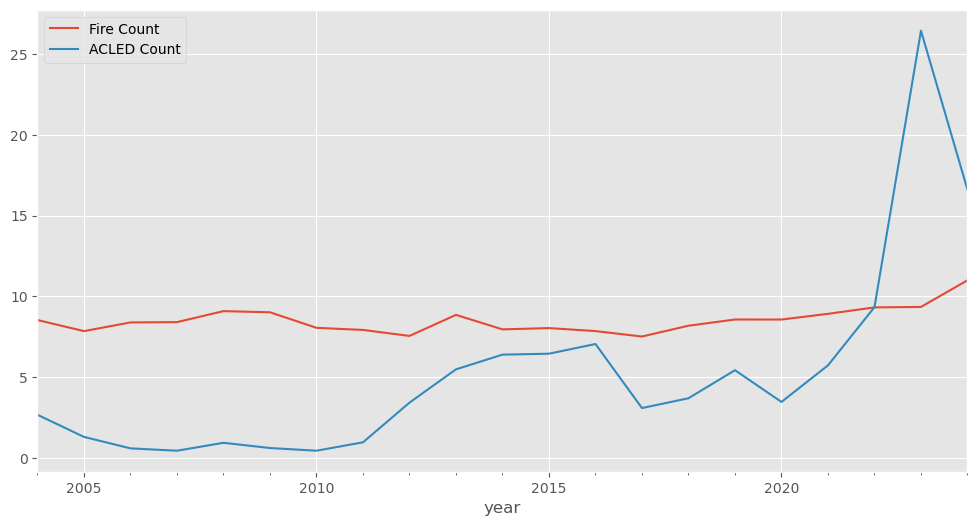

In [53]:
gdf_filter['year'] = pd.to_datetime(gdf_filter['year'], format='%Y')
gdf_filter.set_index('year', inplace=True)

# Time series plot
plt.figure(figsize=(12, 6))
gdf_filter.groupby(gdf_filter.index)['fireCount'].mean().plot()
gdf_filter.groupby(gdf_filter.index)['acled_count'].mean().plot()
plt.legend(['Fire Count', 'ACLED Count'])
plt.show()

Moran's I for fire count: 0.5981
p-value: 0.0010


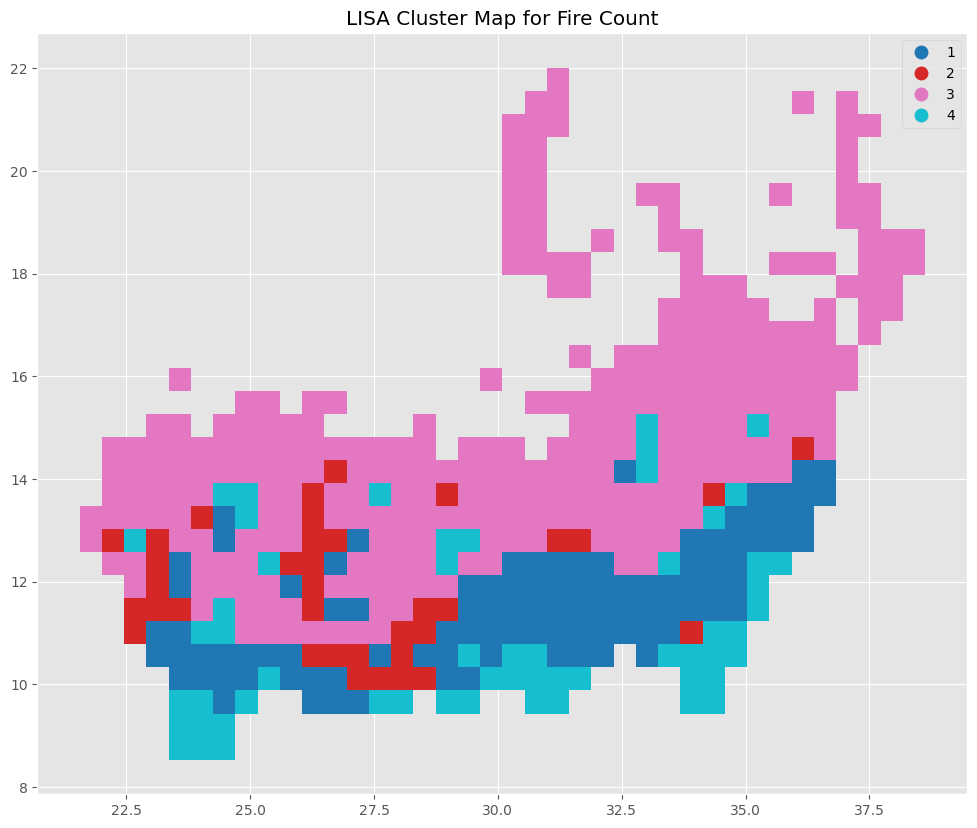

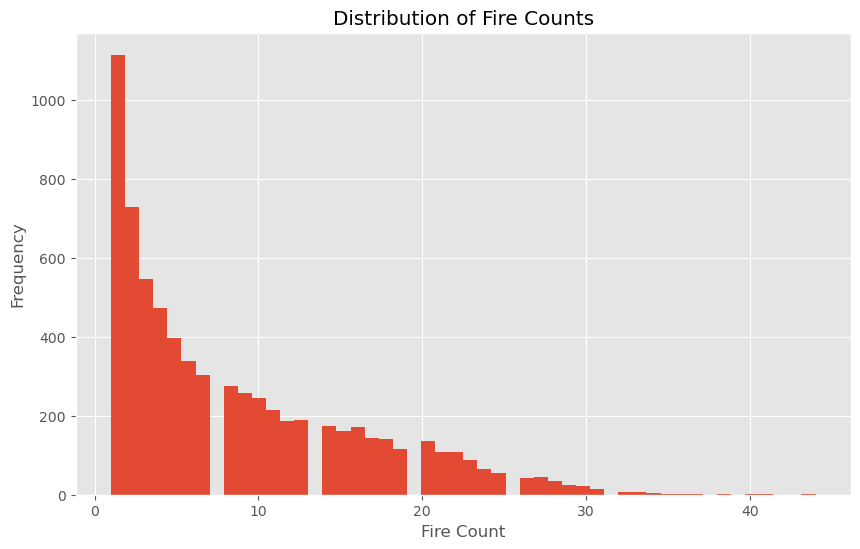

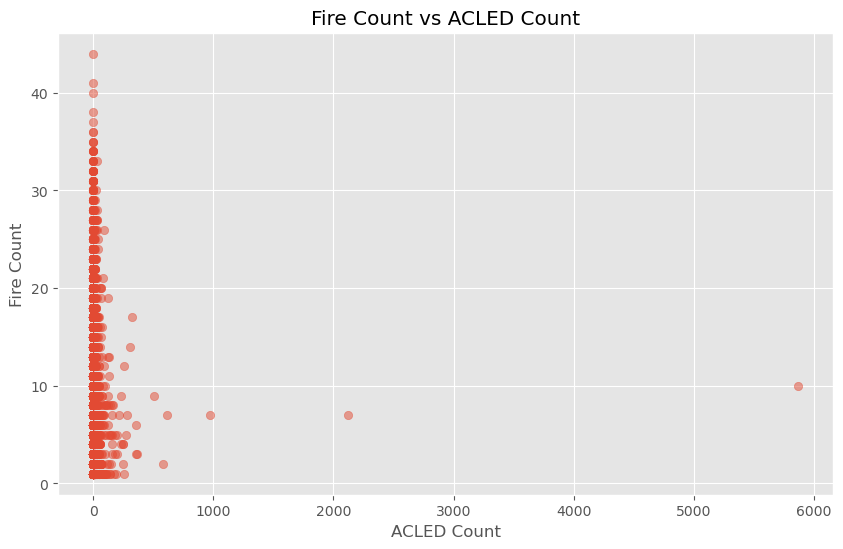


Moran's I for ACLED count: 0.2109
p-value: 0.0010


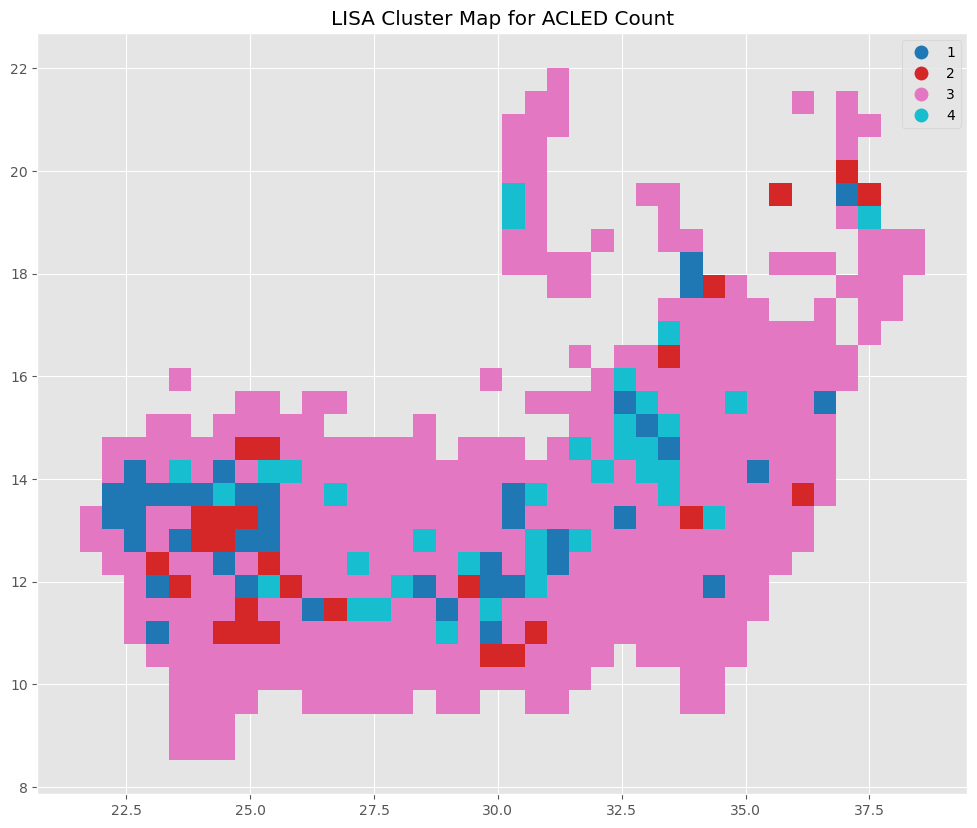

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.lib import weights
import numpy as np

# First, let's reset the index of your GeoDataFrame to ensure consecutive integers
gdf_filter = gdf_filter.reset_index(drop=True)

# Now, let's create the spatial weights matrix
w = weights.distance.KNN.from_dataframe(gdf_filter, k=5)

# Calculate Moran's I for fire count
moran = esda.Moran(gdf_filter['fireCount'], w)
print(f"Moran's I for fire count: {moran.I:.4f}")
print(f"p-value: {moran.p_sim:.4f}")

# Local Indicators of Spatial Association (LISA)
lisa = esda.Moran_Local(gdf_filter['fireCount'], w)

# Plot LISA cluster map
gdf_filter['lisa_cluster'] = lisa.q
fig, ax = plt.subplots(figsize=(12, 10))
gdf_filter.plot(column='lisa_cluster', categorical=True, legend=True, ax=ax)
ax.set_title('LISA Cluster Map for Fire Count')
plt.show()

# Let's also look at the distribution of fire counts
plt.figure(figsize=(10, 6))
gdf_filter['fireCount'].hist(bins=50)
plt.title('Distribution of Fire Counts')
plt.xlabel('Fire Count')
plt.ylabel('Frequency')
plt.show()

# And the relationship between fire count and ACLED count
plt.figure(figsize=(10, 6))
plt.scatter(gdf_filter['acled_count'], gdf_filter['fireCount'], alpha=0.5)
plt.title('Fire Count vs ACLED Count')
plt.xlabel('ACLED Count')
plt.ylabel('Fire Count')
plt.show()

# Let's also check for any spatial patterns in ACLED count
moran_acled = esda.Moran(gdf_filter['acled_count'], w)
print(f"\nMoran's I for ACLED count: {moran_acled.I:.4f}")
print(f"p-value: {moran_acled.p_sim:.4f}")

# And create a LISA cluster map for ACLED count
lisa_acled = esda.Moran_Local(gdf_filter['acled_count'], w)
gdf_filter['lisa_cluster_acled'] = lisa_acled.q
fig, ax = plt.subplots(figsize=(12, 10))
gdf_filter.plot(column='lisa_cluster_acled', categorical=True, legend=True, ax=ax)
ax.set_title('LISA Cluster Map for ACLED Count')
plt.show()

# Adding event_id for Sudan to Acled Data

In [4]:
acled_event_id = pd.read_csv("data/acled_data_with_event_ids/ACLED_2004_Counts_1.csv", encoding="latin1")

In [5]:
acled_event_id

,system:index,acled_count,acled_event_ids,grid_id,year,.geo
0,"52,19",0,[],"52,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"53,19",0,[],"53,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"54,19",0,[],"54,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"52,20",0,[],"52,20",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"53,20",0,[],"53,20",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...
845,"70,49",0,[],"70,49",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
846,"79,49",0,[],"79,49",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
847,"80,49",0,[],"80,49",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
848,"81,49",0,[],"81,49",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [6]:
acled_event_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   system:index     850 non-null    object
 1   acled_count      850 non-null    int64 
 2   acled_event_ids  850 non-null    object
 3   grid_id          850 non-null    object
 4   year             850 non-null    int64 
 5   .geo             850 non-null    object
dtypes: int64(2), object(4)
memory usage: 40.0+ KB


In [8]:
# Filter the DataFrame for the specific grid_id "54,20"
specific_grid_id_df = acled_event_id[acled_event_id['grid_id'] == "54,20"]

# Display the rows corresponding to the grid_id "54,20"
print(specific_grid_id_df)

  system:index  acled_count  \
5        54,20            8   

                                     acled_event_ids grid_id  year  \
5  [SUD2108, SUD2108, SUD2013, SUD2013, SUD2010, ...   54,20  2004   

                                                .geo  
5  {"geodesic":false,"crs":{"type":"name","proper...  


In [7]:
# Assuming your DataFrame is named 'df'
df = acled_event_id[acled_event_id['acled_count'] != 0]

In [8]:
df

,system:index,acled_count,acled_event_ids,grid_id,year,.geo
5,"54,20",8,"[SUD2108, SUD2108, SUD2013, SUD2013, SUD2010, ...","54,20",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
46,"55,23",22,"[SUD2306, SUD2306, SUD2301, SUD2301, SUD2299, ...","55,23",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
72,"54,24",12,"[SUD2035, SUD2035, SUD2115, SUD2115, SUD2279, ...","54,24",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
73,"55,24",16,"[SUD2292, SUD2292, SUD2288, SUD2288, SUD2284, ...","55,24",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
74,"56,24",18,"[SUD1963, SUD1963, SUD1897, SUD1897, SUD1875, ...","56,24",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
80,"62,24",6,"[SUD2097, SUD2097, SUD2092, SUD2092, SUD2084, ...","62,24",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
99,"53,25",2,"[SUD1997, SUD1997]","53,25",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
100,"54,25",4,"[SUD1914, SUD1914, SUD2050, SUD2050]","54,25",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
101,"55,25",6,"[SUD2045, SUD2045, SUD1923, SUD1923, SUD2042, ...","55,25",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
102,"56,25",4,"[SUD2114, SUD2114, SUD2043, SUD2043]","56,25",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [9]:
# Create a new DataFrame with columns `year`, `grid_id`, and `acled_event_ids`
new_df = df[['year', 'grid_id', 'acled_event_ids']]

In [10]:
new_df

,year,grid_id,acled_event_ids
5,2004,"54,20","[SUD2108, SUD2108, SUD2013, SUD2013, SUD2010, ..."
46,2004,"55,23","[SUD2306, SUD2306, SUD2301, SUD2301, SUD2299, ..."
72,2004,"54,24","[SUD2035, SUD2035, SUD2115, SUD2115, SUD2279, ..."
73,2004,"55,24","[SUD2292, SUD2292, SUD2288, SUD2288, SUD2284, ..."
74,2004,"56,24","[SUD1963, SUD1963, SUD1897, SUD1897, SUD1875, ..."
80,2004,"62,24","[SUD2097, SUD2097, SUD2092, SUD2092, SUD2084, ..."
99,2004,"53,25","[SUD1997, SUD1997]"
100,2004,"54,25","[SUD1914, SUD1914, SUD2050, SUD2050]"
101,2004,"55,25","[SUD2045, SUD2045, SUD1923, SUD1923, SUD2042, ..."
102,2004,"56,25","[SUD2114, SUD2114, SUD2043, SUD2043]"


In [110]:
acled_event_id['acled_event_ids']

0      []
1      []
2      []
3      []
4      []
       ..
845    []
846    []
847    []
848    []
849    []
Name: acled_event_ids, Length: 850, dtype: object

In [15]:
# # Checking for non-empty acled_event_ids
# non_empty_acled_event_ids = acled_event_id[acled_event_id['acled_event_ids'].apply(lambda x: len(x) > 0)]
# print(non_empty_acled_event_ids)

In [16]:
# import ast

# def parse_list(s):
#     try:
#         return ast.literal_eval(s)
#     except:
#         return []

# df = pd.read_csv('data/acled_data_with_event_ids/ACLED_2004_Counts_1.csv')
# df['acled_event_ids'] = df['acled_event_ids'].apply(parse_list)

In [126]:
import pandas as pd
import ast

def parse_list(s):
    try:
        return ast.literal_eval(s)
    except:
        return []

# Read the CSV file
df1 = pd.read_csv('data/acled_data_with_event_ids/ACLED_2004_Counts_1.csv', sep='\t')

# Print the column names
print("Columns in the DataFrame:")
print(df1.columns)

# Print the first few rows
print("\nFirst few rows of the DataFrame:")
print(df1.head())

# If 'acled_event_ids' is not in the columns, let's check if it's named differently
possible_event_id_columns = [col for col in df1.columns if 'event' in col.lower()]
if possible_event_id_columns:
    print("\nPossible columns containing event IDs:")
    print(possible_event_id_columns)

# If we find a column that looks like it contains event IDs, let's try to parse it
if possible_event_id_columns:
    column_to_parse = possible_event_id_columns[0]
    df1[column_to_parse] = df1[column_to_parse].apply(parse_list)
    print(f"\nFirst few entries of the '{column_to_parse}' column after parsing:")
    print(df1[column_to_parse].head())

Columns in the DataFrame:
Index(['system:index,acled_count,acled_event_ids,grid_id,year,.geo'], dtype='object')

First few rows of the DataFrame:
  system:index,acled_count,acled_event_ids,grid_id,year,.geo
0  52,19,0,[],"52,19",2004,"{""geodesic"":false,"...        
1  53,19,0,[],"53,19",2004,"{""geodesic"":false,"...        
2  54,19,0,[],"54,19",2004,"{""geodesic"":false,"...        
3  52,20,0,[],"52,20",2004,"{""geodesic"":false,"...        
4  53,20,0,[],"53,20",2004,"{""geodesic"":false,"...        

Possible columns containing event IDs:
['system:index,acled_count,acled_event_ids,grid_id,year,.geo']

First few entries of the 'system:index,acled_count,acled_event_ids,grid_id,year,.geo' column after parsing:
0    (52, 19, 0, [], 52,19, 2004, {geodesic:false,c...
1    (53, 19, 0, [], 53,19, 2004, {geodesic:false,c...
2    (54, 19, 0, [], 54,19, 2004, {geodesic:false,c...
3    (52, 20, 0, [], 52,20, 2004, {geodesic:false,c...
4    (53, 20, 0, [], 53,20, 2004, {geodesic:false,c...
N

In [17]:
# import pandas as pd
# import ast
# import io

# def parse_list(s):
#     try:
#         return ast.literal_eval(s)
#     except:
#         return []

# # Read the CSV file
# with open('data/acled_data_with_event_ids/ACLED_2004_Counts_1.csv', 'r') as file:
#     content = file.read()

# # Replace the problematic commas within the .geo field
# content = content.replace('"{', '{{').replace('}"', '}}')

# # Now read the modified content
# df1 = pd.read_csv(io.StringIO(content), sep=',')

# # Print the column names
# print("Columns in the DataFrame:")
# print(df1.columns)

# # Print the first few rows
# print("\nFirst few rows of the DataFrame:")
# print(df1.head())

# # Parse the acled_event_ids column
# df1['acled_event_ids'] = df1['acled_event_ids'].apply(parse_list)

# print("\nFirst few entries of the 'acled_event_ids' column after parsing:")
# print(df1['acled_event_ids'].head())

# # Parse the .geo column
# df1['.geo'] = df1['.geo'].apply(lambda x: x.replace('{{', '{').replace('}}', '}'))
# df1['.geo'] = df1['.geo'].apply(ast.literal_eval)

# print("\nFirst few entries of the '.geo' column after parsing:")
# print(df1['.geo'].head())

In [18]:
# # import pandas as pd
# # import ast

# # def parse_list(s):
# #     try:
# #         return ast.literal_eval(s)
# #     except:
# #         return []

# # # Read the CSV file (assuming it's correctly read now)
# # df1 = pd.read_csv('data/acled_data_with_event_ids/ACLED_2004_Counts_1.csv', sep=',')

# # # Parse the acled_event_ids column
# # df1['acled_event_ids'] = df1['acled_event_ids'].apply(parse_list)

# # Check for non-empty lists
# non_empty = df1[df1['acled_event_ids'].apply(len) > 0]

# print(f"Number of rows with non-empty acled_event_ids: {len(non_empty)}")

# if len(non_empty) > 0:
#     print("\nSample rows with non-empty acled_event_ids:")
#     print(non_empty[['grid_id', 'acled_count', 'acled_event_ids']].head())
# else:
#     print("\nNo rows found with non-empty acled_event_ids.")

# # Additional check: distribution of list lengths
# length_distribution = df1['acled_event_ids'].apply(len).value_counts().sort_index()
# print("\nDistribution of acled_event_ids list lengths:")
# print(length_distribution)

# # Check for any lists with length not equal to acled_count
# mismatched = df1[df1['acled_event_ids'].apply(len) != df1['acled_count']]
# print(f"\nNumber of rows where length of acled_event_ids doesn't match acled_count: {len(mismatched)}")

# if len(mismatched) > 0:
#     print("\nSample mismatched rows:")
#     print(mismatched[['grid_id', 'acled_count', 'acled_event_ids']].head())